# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 1.1 Reading Data

In [3]:
project_data = pd.read_csv('/content/drive/My Drive/Donors_choose/train_data.csv')
resource_data = pd.read_csv('/content/drive/My Drive/Donors_choose/resources.csv')

In [ ]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [ ]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [ ]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [ ]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [ ]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [ ]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [ ]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [ ]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [ ]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [ ]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [ ]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [ ]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:59<00:00, 1828.66it/s]


In [ ]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [ ]:
# similarly you can preprocess the titles also

## 1.5 Preparing data for models

In [ ]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [ ]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [ ]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [ ]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [ ]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [ ]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [ ]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:31<00:00, 3508.17it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [ ]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:28<00:00, 524.21it/s]


109248
300


In [ ]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [ ]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [ ]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [ ]:
price_standardized

array([[0.00098843, 0.00191166, 0.00330448, ..., 0.00153418, 0.00046704,
        0.00070265]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [ ]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975

D:\installed\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 11: TruncatedSVD

- <font color='red'>step 1</font> Select the top 2k words from essay text and project_title (concatinate essay text with project title and then find the top 2k words) based on their <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>`idf_`</a> values 
- <font color='red'>step 2</font> Compute the co-occurance matrix with these 2k words, with window size=5 (<a href='https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/'>ref</a>)
    <img src='cooc.JPG' width=300px>
- <font color='red'>step 3</font> Use <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on calculated co-occurance matrix and reduce its dimensions, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a>
 >- The shape of the matrix after TruncatedSVD will be 2000\*n, i.e. each row represents a vector form of the corresponding word. <br>
 >- Vectorize the essay text and project titles using these word vectors. (while vectorizing, do ignore all the words which are not in top 2k words)
- <font color='red'>step 4</font> Concatenate these truncatedSVD matrix, with the matrix with features
<ul>
    <li><strong>school_state</strong> : categorical data</li>
    <li><strong>clean_categories</strong> : categorical data</li>
    <li><strong>clean_subcategories</strong> : categorical data</li>
    <li><strong>project_grade_category</strong> :categorical data</li>
    <li><strong>teacher_prefix</strong> : categorical data</li>
    <li><strong>quantity</strong> : numerical data</li>
    <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
    <li><strong>price</strong> : numerical data</li>
    <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
    <li><strong>number of words in the title</strong> : numerical data</li>
    <li><strong>number of words in the combine essays</strong> : numerical data</li>
    <li><strong>word vectors calculated in</strong> <font color='red'>step 3</font> : numerical data</li>
</ul>
- <font color='red'>step 5</font>: Apply GBDT on matrix that was formed in <font color='red'>step 4</font> of this assignment, <font color='blue'><strong>DO REFER THIS BLOG: <a href='https://www.kdnuggets.com/2017/03/simple-xgboost-tutorial-iris-dataset.html'>XGBOOST DMATRIX<strong></a></font>
<li><font color='red'>step 6</font>:Hyper parameter tuning (Consider any two hyper parameters)<ul><li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>



In [ ]:
import sys
import math
 
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score

# you might need to install this one
import xgboost as xgb

class XGBoostClassifier():
    def __init__(self, num_boost_round=10, **params):
        self.clf = None
        self.num_boost_round = num_boost_round
        self.params = params
        self.params.update({'objective': 'multi:softprob'})
 
    def fit(self, X, y, num_boost_round=None):
        num_boost_round = num_boost_round or self.num_boost_round
        self.label2num = {label: i for i, label in enumerate(sorted(set(y)))}
        dtrain = xgb.DMatrix(X, label=[self.label2num[label] for label in y])
        self.clf = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=num_boost_round, verbose_eval=1)
 
    def predict(self, X):
        num2label = {i: label for label, i in self.label2num.items()}
        Y = self.predict_proba(X)
        y = np.argmax(Y, axis=1)
        return np.array([num2label[i] for i in y])
 
    def predict_proba(self, X):
        dtest = xgb.DMatrix(X)
        return self.clf.predict(dtest)
 
    def score(self, X, y):
        Y = self.predict_proba(X)[:,1]
        return roc_auc_score(y, Y)
 
    def get_params(self, deep=True):
        return self.params
 
    def set_params(self, **params):
        if 'num_boost_round' in params:
            self.num_boost_round = params.pop('num_boost_round')
        if 'objective' in params:
            del params['objective']
        self.params.update(params)
        return self
    

clf = XGBoostClassifier(eval_metric = 'auc', num_class = 2, nthread = 4,)
###################################################################
#               Change from here                                  #
###################################################################
parameters = {
    'num_boost_round': [100, 250, 500],
    'eta': [0.05, 0.1, 0.3],
    'max_depth': [6, 9, 12],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
}

clf = GridSearchCV(clf, parameters)
X = np.array([[1,2], [3,4], [2,1], [4,3], [1,0], [4,5]])
Y = np.array([0, 1, 0, 1, 0, 1])
clf.fit(X, Y)

# print(clf.grid_scores_)
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

score: 0.8333333333333334
colsample_bytree: 0.9
eta: 0.05
max_depth: 6
num_boost_round: 100
subsample: 0.9


<h1>2. TruncatedSVD </h1>

<h2>2.1 Selecting top 2000 words from `essay` and `project_title`</h2>

In [5]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
data=pd.read_csv('/content/drive/My Drive/Donors_choose/preprocessed_train_data.csv',delimiter = ',',nrows=15000, encoding='latin-1')
data.head(5)

y = data['project_is_approved'].values
data.drop(['project_is_approved'], axis=1, inplace=True)

X = data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)



print(X_test.head())    

print(X_test.shape)   

       Unnamed: 0  Unnamed: 0.1  ...   price quantity
10236       10236        119159  ...  297.98       12
14413       14413        131037  ...  339.74       21
12461       12461        142058  ...    5.25       50
1090         1090         61535  ...   48.15        3
13612       13612        154512  ...  311.37        2

[5 rows x 20 columns]
(4950, 20)


In [6]:
X_train['Combined']=X_train['preprocessed_essay']+X_train['preprocessed_project_title']
X_cv['Combined']=X_cv['preprocessed_essay']+X_cv['preprocessed_project_title']
X_test['Combined']=X_test['preprocessed_essay']+X_test['preprocessed_project_title']

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['Combined'].values) # fit has to happen only on train data
#vec = vectorizer.named_steps['vec']
features_tfidf_combined = vectorizer.get_feature_names()
#print(features)


X_train_combined_tfidf = vectorizer.transform(X_train['Combined'].values)
X_cv_combined_tfidf = vectorizer.transform(X_cv['Combined'].values)
X_test_combined_tfidf = vectorizer.transform(X_test['Combined'].values)

print("After vectorizations")
print(X_train_combined_tfidf.shape, y_train.shape)
print(X_cv_combined_tfidf.shape, y_cv.shape)
print(X_test_combined_tfidf.shape, y_test.shape)
print("="*100)  

After vectorizations
(6733, 5199) (6733,)
(3317, 5199) (3317,)
(4950, 5199) (4950,)


In [8]:
idf_combined_values=vectorizer.idf_

idf_score_features=[]
for i in range(len(idf_combined_values)):
    idf_score_features.append([idf_combined_values[i],features_tfidf_combined[i]])

In [9]:
idf_score_features.sort(reverse=True)
top_2k=idf_score_features[:2000]

<h2>2.2 Computing Co-occurance matrix</h2>

In [10]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

Co_occurance_matrix=np.zeros((2000,2000))
window=5
top_2k_features=[]
for i in range(2000):
    top_2k_features.append(top_2k[i][1])    

In [11]:
for sentance in X_train['Combined'].values:
    sen=sentance.split()
    for i,word in enumerate(sen):
        if word in top_2k_features:
            for i in range(max(0,i-window),min(i+window,len(sen))):
                if sen[i] in top_2k_features:
                    Co_occurance_matrix[top_2k_features.index(sen[i]),top_2k_features.index(word)]+=1

<h2>2.3 Applying TruncatedSVD and Calculating Vectors for `essay` and `project_title`</h2>

In [12]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.decomposition import TruncatedSVD
no_components=[100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,1999]
variance=[]
for n in no_components:
    tsvd=TruncatedSVD(n_components=n,random_state=60)
    tsvd.fit(Co_occurance_matrix)
    var=tsvd.explained_variance_ratio_.sum()
    variance.append(var)
    
       

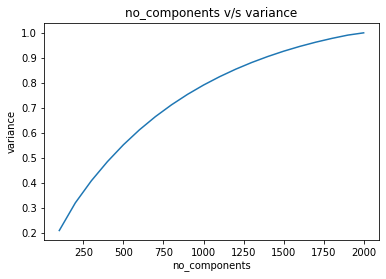

In [13]:
plt.plot(no_components, variance)
plt.xlabel('no_components')
plt.ylabel("variance")
plt.title("no_components v/s variance")
plt.show()

In [14]:
tsvd=TruncatedSVD(n_components=1100,random_state=60)
Co_occurance_matrix=tsvd.fit_transform(Co_occurance_matrix)

In [15]:
cooc_dict = {}
for i in range(len(top_2k_features)):
    cooc_dict[top_2k_features[i]] = Co_occurance_matrix[i]

In [16]:
glove_words=set(cooc_dict.keys())

In [17]:
X_train_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essay'].values): # for each review/sentence
    vector = np.zeros(1100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += cooc_dict[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_essay_avg_w2v.append(vector)

print(len(X_train_essay_avg_w2v))
print(len(X_train_essay_avg_w2v[0]))

X_cv_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essay'].values): # for each review/sentence
    vector = np.zeros(1100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += cooc_dict[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_essay_avg_w2v.append(vector)

print(len(X_cv_essay_avg_w2v))
print(len(X_cv_essay_avg_w2v[0]))

X_test_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essay'].values): # for each review/sentence
    vector = np.zeros(1100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += cooc_dict[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_essay_avg_w2v.append(vector)

  0%|          | 0/4950 [00:00<?, ?it/s]

6733
1100
3317
1100


100%|██████████| 4950/4950 [00:00<00:00, 20140.04it/s]


In [18]:
X_train_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(1100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += cooc_dict[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_title_avg_w2v.append(vector)

print(len(X_train_title_avg_w2v))
print(len(X_train_title_avg_w2v[0]))

X_cv_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(1100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += cooc_dict[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_title_avg_w2v.append(vector)

print(len(X_cv_title_avg_w2v))
print(len(X_cv_title_avg_w2v[0]))

X_test_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(1100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += cooc_dict[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_title_avg_w2v.append(vector)

print(len(X_test_title_avg_w2v))
print(len(X_test_title_avg_w2v[0]))


100%|██████████| 4950/4950 [00:00<00:00, 169163.75it/s]

6733
1100
3317
1100
4950
1100


<h2>2.4 Merge the features from <font color='red'>step 3</font> and <font color='red'>step 4</font></h2>

In [19]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

from collections import Counter
my_counter = Counter()
for word in data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
X_train_clean_cat = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_cat = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_cat = vectorizer.transform(X_test['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_clean_cat.shape)
print("Shape of matrix after one hot encodig ",X_cv_clean_cat.shape)
print("Shape of matrix after one hot encodig ",X_test_clean_cat.shape)     

['History_Civics', 'Health_Sports', 'Music_Arts', 'SpecialNeeds', 'AppliedLearning', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (6733, 7)
Shape of matrix after one hot encodig  (3317, 7)
Shape of matrix after one hot encodig  (4950, 7)


In [20]:
from collections import Counter
my_counter = Counter()
for word in data['clean_subcategories'].values:
    my_counter.update(word.split())

sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
X_train_sub_cat = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_sub_cat = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_sub_cat = vectorizer.transform(X_test['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_sub_cat.shape)
print("Shape of matrix after one hot encodig ",X_cv_sub_cat.shape)
print("Shape of matrix after one hot encodig ",X_test_sub_cat.shape)

['FinancialLiteracy', 'Economics', 'NutritionEducation', 'ParentInvolvement', 'CommunityService', 'Extracurricular', 'ForeignLanguages', 'Civics_Government', 'Gym_Fitness', 'TeamSports', 'PerformingArts', 'College_CareerPrep', 'SocialSciences', 'CharacterEducation', 'Music', 'Other', 'History_Geography', 'ESL', 'Health_Wellness', 'Health_LifeScience', 'EarlyDevelopment', 'EnvironmentalScience', 'VisualArts', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (6733, 28)
Shape of matrix after one hot encodig  (3317, 28)
Shape of matrix after one hot encodig  (4950, 28)


In [21]:
from collections import Counter
my_counter = Counter()
for word in data['clean_school_state'].values:
    my_counter.update(word.split())

school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['clean_school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['clean_school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['clean_school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(6733, 51) (6733,)
(3317, 51) (3317,)
(4950, 51) (4950,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [22]:
from collections import Counter
my_counter = Counter()
for word in data['clean_teacher_prefix'].values.astype('U'):
    my_counter.update(word.split())

teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_teacher_prefix'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['clean_teacher_prefix'].values.astype('U'))
X_cv_teacher_ohe = vectorizer.transform(X_cv['clean_teacher_prefix'].values.astype('U'))
X_test_teacher_ohe = vectorizer.transform(X_test['clean_teacher_prefix'].values.astype('U'))

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(6733, 5) (6733,)
(3317, 5) (3317,)
(4950, 5) (4950,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [23]:
from collections import Counter
my_counter = Counter()
for word in data['clean_project_grade_category'].values:
    my_counter.update(word.split())

clean_project_grade_dict = dict(my_counter)
sorted_clean_project_grade_dict = dict(sorted(clean_project_grade_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_clean_project_grade_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['clean_project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['clean_project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['clean_project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(6733, 4) (6733,)
(3317, 4) (3317,)
(4950, 4) (4950,)
['Grades9-12', 'Grades6-8', 'Grades3-5', 'GradesPreK-2']


In [24]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [25]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)

After vectorizations
(6733, 1) (6733,)
(3317, 1) (3317,)
(4950, 1) (4950,)


In [26]:
normalizer.fit(X_train['quantity'].values.reshape(-1,1))

X_train_quantity_norm = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_quantity_norm = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_cv_quantity_norm.shape, y_cv.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(6733, 1) (6733,)
(3317, 1) (3317,)
(4950, 1) (4950,)


In [27]:
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_posted_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_posted_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_posted_projects_norm.shape, y_train.shape)
print(X_cv_posted_projects_norm.shape, y_cv.shape)
print(X_test_posted_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(6733, 1) (6733,)
(3317, 1) (3317,)
(4950, 1) (4950,)


In [28]:
X_train_title_wc = []
X_train_title = list(X_train['preprocessed_project_title'])
for i in X_train_title:
    b = len(str(i).split())
    X_train_title_wc.append(b)
X_train_title_wc = np.array(X_train_title_wc)

X_cv_title_wc = []
X_cv_title = list(X_cv['preprocessed_project_title'])
for i in X_cv_title:
    b = len(str(i).split())
    X_cv_title_wc.append(b)
X_cv_title_wc = np.array(X_cv_title_wc)

X_test_title_wc = []
X_test_title = list(X_test['preprocessed_project_title'])
for i in X_test_title:
    b = len(str(i).split())
    X_test_title_wc.append(b)
X_test_title_wc = np.array(X_test_title_wc)

In [29]:
X_train_essay_wc = []
X_train_essay = list(X_train['preprocessed_essay'])
for i in X_train_essay:
    b = len(str(i).split())
    X_train_essay_wc.append(b)
X_train_essay_wc = np.array(X_train_essay_wc)

X_cv_essay_wc = []
X_cv_essay = list(X_cv['preprocessed_essay'])
for i in X_cv_essay:
    b = len(str(i).split())
    X_cv_essay_wc.append(b)
X_cv_essay_wc = np.array(X_cv_essay_wc)

X_test_essay_wc = []
X_test_essay = list(X_test['preprocessed_essay'])
for i in X_test_essay:
    b = len(str(i).split())
    X_test_essay_wc.append(b)
X_test_essay_wc = np.array(X_test_essay_wc)

In [30]:
from sklearn.preprocessing import StandardScaler

SC = StandardScaler()
SC.fit(X_train_title_wc.reshape(-1,1))

X_train_title_wc_sc  = SC.transform(X_train_title_wc.reshape(-1,1))
X_cv_title_wc_sc  = SC.transform(X_cv_title_wc.reshape(-1,1))
X_test_title_wc_sc  = SC.transform(X_test_title_wc.reshape(-1,1))


In [31]:
SC = StandardScaler()
SC.fit(X_train_essay_wc.reshape(-1,1))

X_train_essay_wc_sc  = SC.transform(X_train_essay_wc.reshape(-1,1))
X_cv_essay_wc_sc  = SC.transform(X_cv_essay_wc.reshape(-1,1))
X_test_essay_wc_sc  = SC.transform(X_test_essay_wc.reshape(-1,1))

In [32]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

X_train_essay_senti = []
X_train_essay = list(X_train['preprocessed_essay'])
for i in X_train_essay:
    score = sia.polarity_scores(str(i))
    X_train_essay_senti.append(score)
X_train_essay_senti = np.array(X_train_essay_senti)

X_train_essay_neg = []
X_train_essay_neut = []
X_train_essay_posiive = []
for i in X_train_essay_senti:
    neg = i['neg']
    X_train_essay_neg.append(neg)
    neu = i['neu']
    X_train_essay_neut.append(neu)
    pos = i['pos']
    X_train_essay_posiive.append(pos)
    
    
X_train_essay_neg = np.array(X_train_essay_neg).reshape(-1,1)
X_train_essay_neut = np.array(X_train_essay_neut).reshape(-1,1)
X_train_essay_posiive = np.array(X_train_essay_posiive).reshape(-1,1)
   
print((X_train_essay_neg.shape))
print((X_train_essay_neut.shape))
print((X_train_essay_posiive.shape))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
(6733, 1)
(6733, 1)
(6733, 1)


In [33]:
X_test_essay_senti = []
X_test_essay = list(X_test['preprocessed_essay'])
for i in X_test_essay:
    score = sia.polarity_scores(str(i))
    X_test_essay_senti.append(score)
X_test_essay_senti = np.array(X_test_essay_senti)

X_test_essay_neg = []
X_test_essay_neut = []
X_test_essay_posiive = []
for i in X_test_essay_senti:
    neg = i['neg']
    X_test_essay_neg.append(neg)
    neu = i['neu']
    X_test_essay_neut.append(neu)
    pos = i['pos']
    X_test_essay_posiive.append(pos)
    
    
X_test_essay_neg = np.array(X_test_essay_neg).reshape(-1,1)
X_test_essay_neut = np.array(X_test_essay_neut).reshape(-1,1)
X_test_essay_posiive = np.array(X_test_essay_posiive).reshape(-1,1)
   
print((X_test_essay_neg.shape))
print((X_test_essay_neut.shape))
print((X_test_essay_posiive.shape))

(4950, 1)
(4950, 1)
(4950, 1)


In [34]:
X_cv_essay_senti = []
X_cv_essay = list(X_cv['preprocessed_essay'])
for i in X_cv_essay:
    score = sia.polarity_scores(str(i))
    X_cv_essay_senti.append(score)
X_cv_essay_senti = np.array(X_cv_essay_senti)

X_cv_essay_neg = []
X_cv_essay_neut = []
X_cv_essay_posiive = []
for i in X_cv_essay_senti:
    neg = i['neg']
    X_cv_essay_neg.append(neg)
    neu = i['neu']
    X_cv_essay_neut.append(neu)
    pos = i['pos']
    X_cv_essay_posiive.append(pos)
    
    
X_cv_essay_neg = np.array(X_cv_essay_neg).reshape(-1,1)
X_cv_essay_neut = np.array(X_cv_essay_neut).reshape(-1,1)
X_cv_essay_posiive = np.array(X_cv_essay_posiive).reshape(-1,1)
   
print((X_cv_essay_neg.shape))
print((X_cv_essay_neut.shape))
print((X_cv_essay_posiive.shape))

(3317, 1)
(3317, 1)
(3317, 1)


<h2>2.5 Apply XGBoost on the Final Features from the above section</h2>

https://xgboost.readthedocs.io/en/latest/python/python_intro.html

In [35]:
# No need to split the data into train and test(cv)
# use the Dmatrix and apply xgboost on the whole data
# please check the Quora case study notebook as reference

# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

from scipy import sparse
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_avg_w2v,X_train_essay_wc_sc,X_train_title_wc_sc,X_train_essay_neg ,X_train_essay_neut,X_train_essay_posiive, X_train_title_avg_w2v,X_train_clean_cat,X_train_sub_cat,X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_quantity_norm,X_train_posted_projects_norm)).tocsr()
X_cr = hstack((X_cv_essay_avg_w2v,X_cv_essay_wc_sc,X_cv_title_wc_sc,X_cv_essay_neg ,X_cv_essay_neut,X_cv_essay_posiive, X_cv_title_avg_w2v,X_cv_clean_cat,X_cv_sub_cat,X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_quantity_norm,X_cv_posted_projects_norm)).tocsr()
X_te = hstack((X_test_essay_avg_w2v,X_test_essay_wc_sc,X_test_title_wc_sc,X_test_essay_neg ,X_test_essay_neut,X_test_essay_posiive, X_test_title_avg_w2v,X_test_clean_cat,X_test_sub_cat,X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_quantity_norm,X_test_posted_projects_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)    

Final Data matrix
(6733, 2303) (6733,)
(3317, 2303) (3317,)
(4950, 2303) (4950,)


In [36]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

gbdt = xgb.XGBClassifier(n_jobs=-1,class_weight='balanced')
parameters = {'n_estimators': [10,20,30], 'max_depth':[40,50,100,150,200]}
clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']

In [37]:
train_auc = train_auc.reshape(3,5)
cv_auc = cv_auc.reshape(3,5)

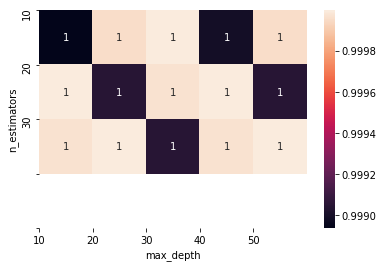

In [38]:
import matplotlib.pyplot as plt


import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(train_auc,annot=True)

plt.yticks(np.arange(5), [10,20,30])
plt.xticks(np.arange(5), [10,20,30,40,50])

plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.show()

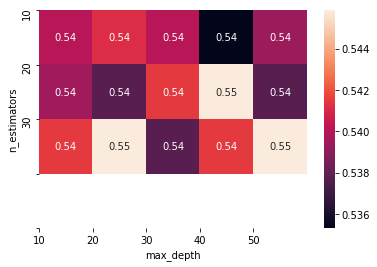

In [39]:
import matplotlib.pyplot as plt
# plt.show()

import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(cv_auc,annot=True)

plt.yticks(np.arange(5), [10,20,30])
plt.xticks(np.arange(5), [10,20,30,40,50])

plt.xlabel('max_depth')
plt.ylabel('n_estimators')


plt.show()

In [40]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

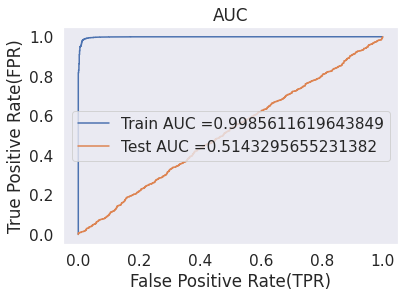

In [47]:
from sklearn.metrics import roc_curve, auc

gbdt = xgb.XGBClassifier(max_depth = 30, n_estimators = 10,n_jobs=-1,class_weight='balanced')
gbdt.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs

y_train_pred = batch_predict(gbdt, X_tr)
y_test_pred = batch_predict(gbdt, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [48]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [50]:
print(train_fpr.shape)
print(train_tpr.shape)
print(tr_thresholds.shape)


(310,)
(310,)
(310,)


In [52]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test[:], predict(y_test_pred, te_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.9704202422968667 for threshold 0.678
[[ 948   14]
 [  88 5683]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2679260662143696 for threshold 0.747
[[ 352  356]
 [1956 2286]]


<h1>3. Conclusion</h1>

In [53]:
# Please write down few lines about what you observed from this assignment. 
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]
x.add_row(["AVG W2V", "XGBoost", "Max Depth:30 , n_estimators:10", 0.51])
print(x)

+------------+---------+--------------------------------+------+
| Vectorizer |  Model  |        Hyper Parameter         | AUC  |
+------------+---------+--------------------------------+------+
|  AVG W2V   | XGBoost | Max Depth:30 , n_estimators:10 | 0.51 |
+------------+---------+--------------------------------+------+
